# Project: Investigate a Dataset (The Movie Database (TMDb))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The purpose of investigating this data set is to get findings to improve the movie industry.



### Questions
#### What is the most popular movie?
#### Which movie has the highest rate?
#### Which movie has the highetst revenue?
#### Which movie has the highest budget?
#### What is the most frequent runtime duration of the movies?

#### Which movie genre has the highest number of movie released?
#### Who is the director has directed the most movies?
#### What are the most 10 companies that have produced movies?
#### Who is the most actor has made movies?
#### What is the most year has movies released?
#### What is the most month has movies released?

#### Is there a relationship between movie revenue and its popularity? How?
#### Is there a relationship between movie revenue and its rate? How?
#### Is there a relationship between movie revenue and its budget? How?

In [1]:
# import all of the packages that will be used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
# Data Wrangling


### General Properties

In [2]:
# Load data and display a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

file_name = "C:/Users/Softpro/Downloads/Data Analysis Excel Quiz/Project/tmdb-movies.csv"
df = pd.read_csv(file_name)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#get the dimensions of dataframe (numeber of rows, number of columns)
df.shape

(10866, 21)

In [4]:
#view the data type of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#count the number of null values for each column (missing data)
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# preview stats for each columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#total number of duplicates
sum(df.duplicated()) 

1

### Data Cleaning (remove duplicated rows, remove extraneous columns, fix dataframe type, deat with NaN)

In [8]:
### Drop Extraneous Columns which will not be used in the analysis and then check the dataframe lables
df.drop(["id", "imdb_id", "homepage", "tagline", "keywords", "overview", "budget_adj", "vote_count", "revenue_adj"], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015


In [9]:
#Delete the duplicated row and make sure that dataframe has zero duplicates
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [10]:
#remove rows that has missing data
df.dropna(axis=0, inplace=True)

#make sure that threre is no missing data
df.isnull().sum().sum()

0

In [11]:
#find all "0" values in "budget" and "revenue" and preview them
df.query('budget == 0 or revenue == 0').head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,6.4,2015
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,6.2,2015


In [12]:
#creat a function that can change the "0" values into the mean
def change_0 (column_name): #the function take the column name as an argument
    df[column_name].replace(0,np.NAN, inplace=True) #change the "0" values with "NAN" values
    df.fillna(df[column_name].mean(), inplace=True) #change the "NAN" values with the mean
    return df #return clean "df" from "0" values

In [13]:
#remove the "0" values in "budget" and "revenue" using the previous function
change_0("budget")
change_0("revenue")

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,3.148929e+07,9.099524e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,7.4,1966
10862,0.065543,3.148929e+07,9.099524e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,5.7,1966
10863,0.065141,3.148929e+07,9.099524e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,6.5,1966
10864,0.064317,3.148929e+07,9.099524e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,5.4,1966


In [14]:
#make sure that there are no "0" values in "budget" and "revenue"
df.query('budget == 0 or revenue == 0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year


In [15]:
#change the column "release_date" format to be parseable
df["release_date"] = pd.to_datetime(df["release_date"])

#chech the data type and display "releas_date" column
df["release_date"].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
# Exploratory Data Analysis

## Part 1
### Research Question 1 (Which movie has the highest rate?)

In [16]:
#what is the highest popularity?
max_pop = df["popularity"].max()
max_pop

32.985763

In [17]:
#get the movie that is the most popular
df.query('popularity == 32.985763')["original_title"]

0    Jurassic World
Name: original_title, dtype: object

### Research Question 2  (Which movie has the highetst revenue?)

In [18]:
#what is the highest revenue?
max_revenue = df["revenue"].max()
max_revenue

2781505847.0

In [19]:
#get the movie that has the highest revenue
df.query('revenue == 2781505847')["original_title"]

1386    Avatar
Name: original_title, dtype: object

### Research Question 3  (Which movie has the highest rate?)

In [20]:
#what is the highest rate?
max_rate = df["vote_average"].max()
max_rate

8.7

In [21]:
#get the movie that has the highest revenue
df.query('vote_average == 8.7')["original_title"]

6911    Pink Floyd: Pulse
Name: original_title, dtype: object

### Research Question 4 (What is the most frequent runtime duration of the movies?)

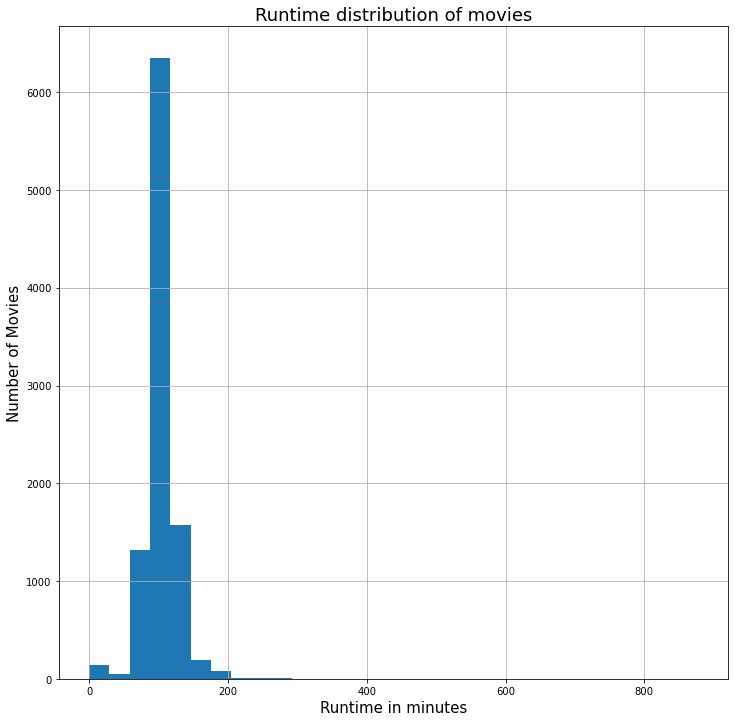

In [22]:
# Create a histogram for movie runtimes
df["runtime"].hist(figsize=(12,12), bins=30);
plt.xlabel('Runtime in minutes', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of movies', fontsize=18);


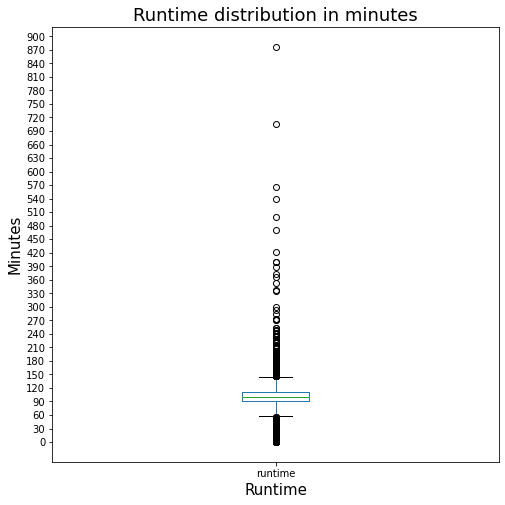

In [23]:
# Create a boxplot for movie runtimes
df['runtime'].plot(kind = 'box', figsize = (8,8), yticks=np.arange(0,930,30));
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Minutes', fontsize=15)
plt.title('Runtime distribution in minutes', fontsize=18);


### The previous section was about the movies:

##### 1- "Jurassic World" is the most popular movie.
##### 2- "Avatar" has the highest revenue.
##### 3- "pink Floyd: Pulse" has the highest rate.
##### 4- The most frequent runtime duration of the movies is in the range (90-120) minutes.

## Part 2

### Research Question 1 (Which movie genre has the highest number of movie released?)

In [24]:
#create a function to get the top 10
def top_10 (column_label): #the function take the "column label" as an argument
    df_column = pd.DataFrame((df[column_label].str.cat(sep = '|')).split("|")) 
    return df_column.value_counts().iloc[:10]

In [25]:
#use the previous function to get the top 10 in movies genres
df_genre = top_10("genres")
df_genre

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
dtype: int64

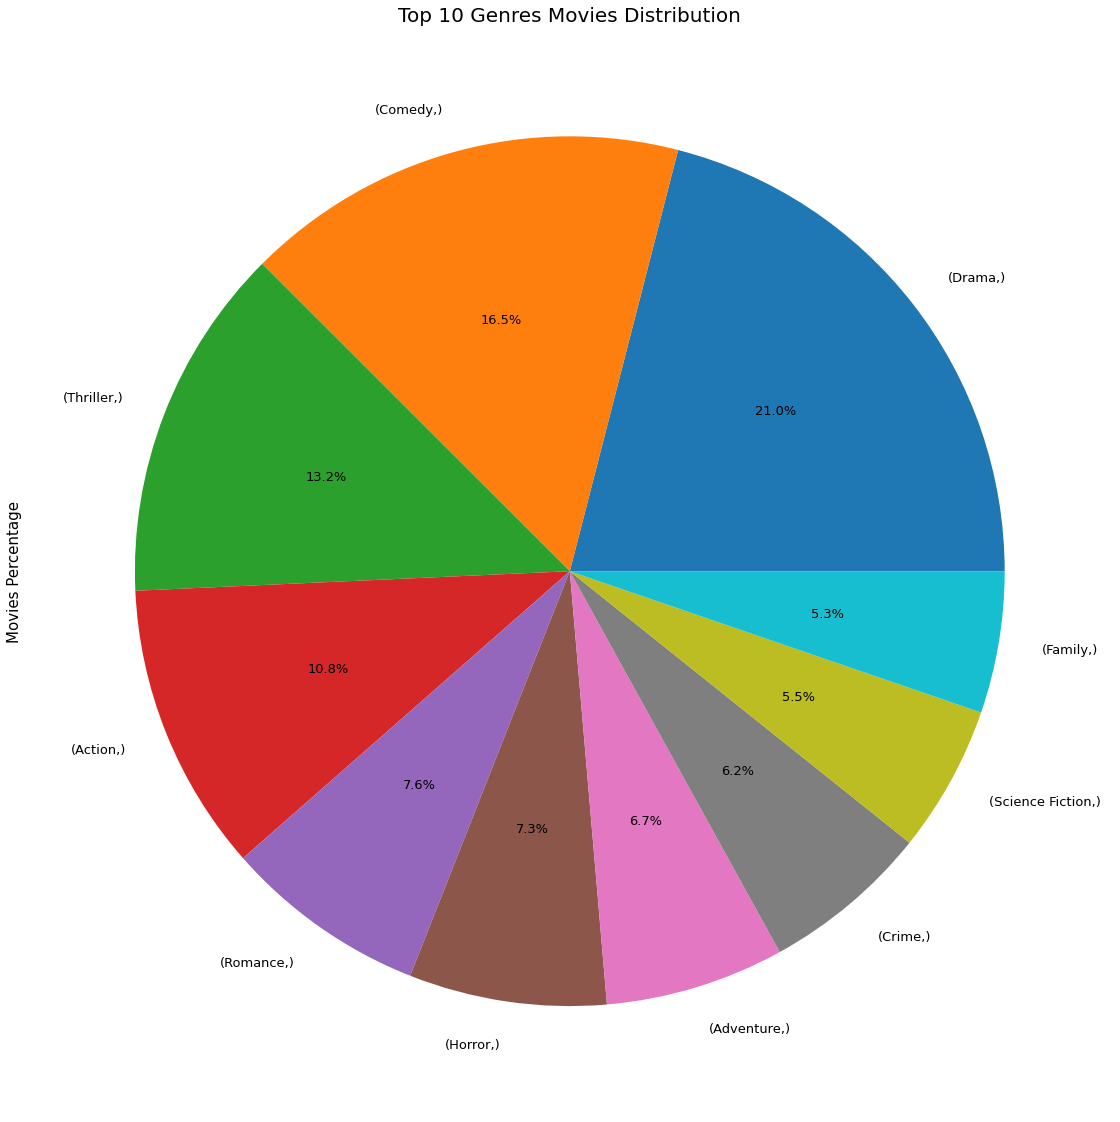

In [26]:
#create a plot of the top 10 movies genres
df_genre.plot(kind="pie", fontsize=13, figsize=(20,20), autopct='%1.1f%%');
plt.title("Top 10 Genres Movies Distribution" , fontsize= 20);
plt.ylabel("Movies Percentage", fontsize=15);

### Research Question 2 (Who is the director who has directed the most movies?)

In [27]:
#use the previous function to get the top 10 in directors
df_director =top_10("director")
df_director

Woody Allen          43
Clint Eastwood       34
Steven Spielberg     30
Martin Scorsese      28
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
dtype: int64

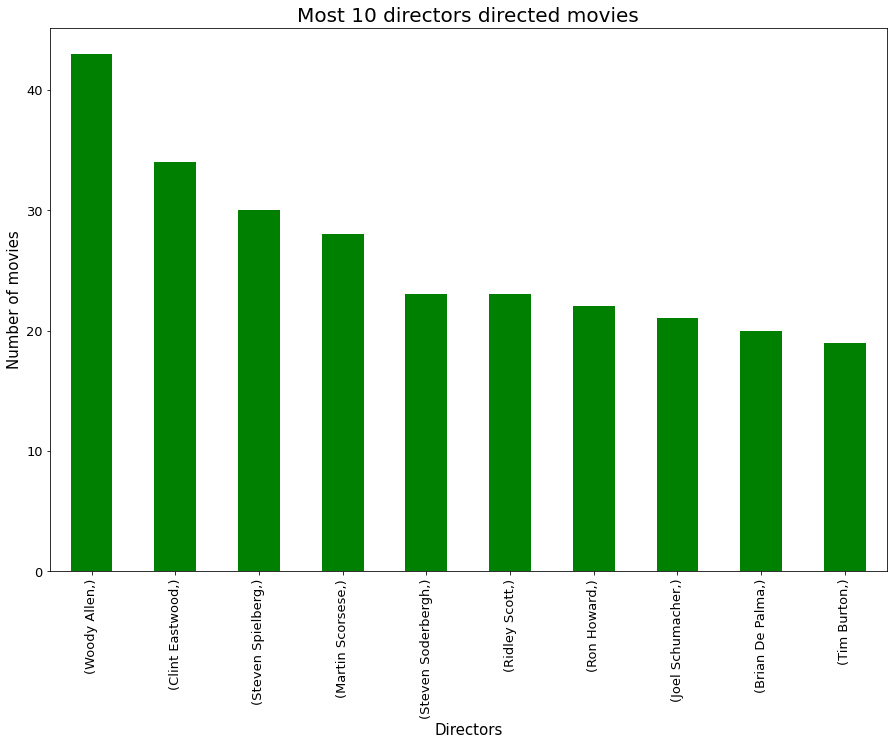

In [28]:
#Create a bar chart of the most 10 directors who have directed movies
df_director.plot(kind="bar", fontsize= 13, figsize= (15,10), color="green");
plt.title("Most 10 directors directed movies", fontsize=20);
plt.xlabel("Directors", fontsize=15);
plt.ylabel("Number of movies", fontsize=15);

### Research Question 3 (What are the most 10 companies that have produced movies?)

In [31]:
#use the previous function to get the top 10 of production companies
df_company = top_10("production_companies")
df_company

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

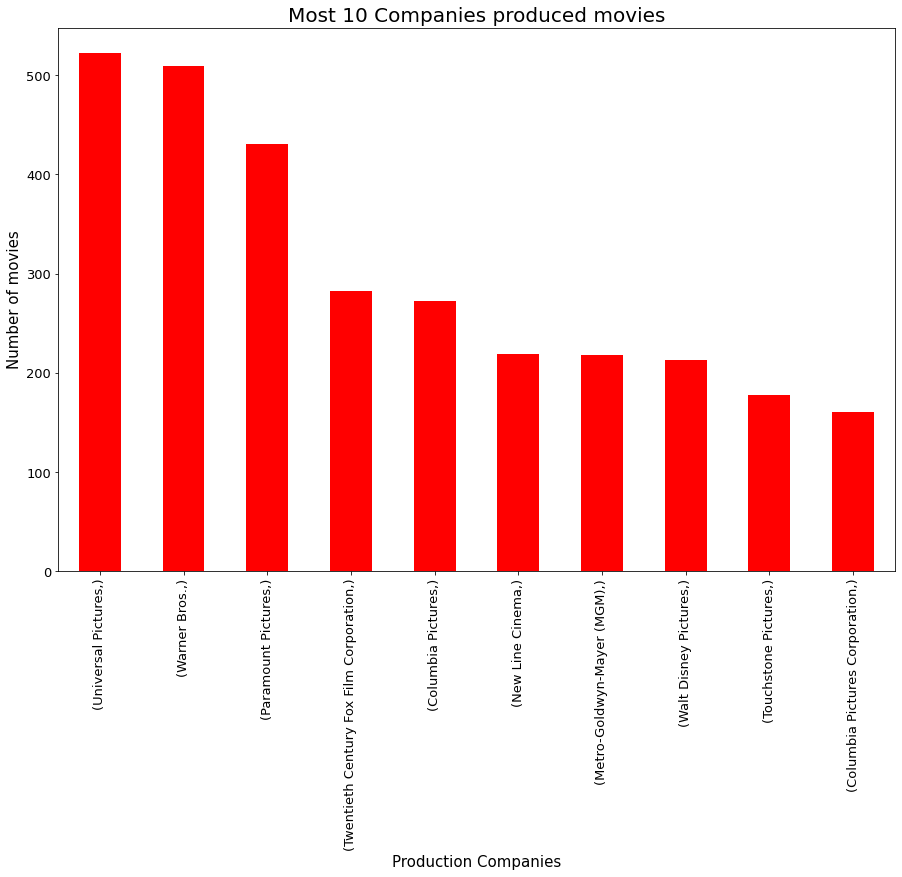

In [30]:
#Create a bar chart of the most 10 companies that produced movies
df_company.plot(kind="bar", fontsize= 13, figsize= (15,10), color="red");
plt.title("Most 10 Companies produced movies", fontsize=20);
plt.xlabel("Production Companies", fontsize=15);
plt.ylabel("Number of movies", fontsize=15);

### Research Question 4 (Who are the most 10 actors that have made movies?)

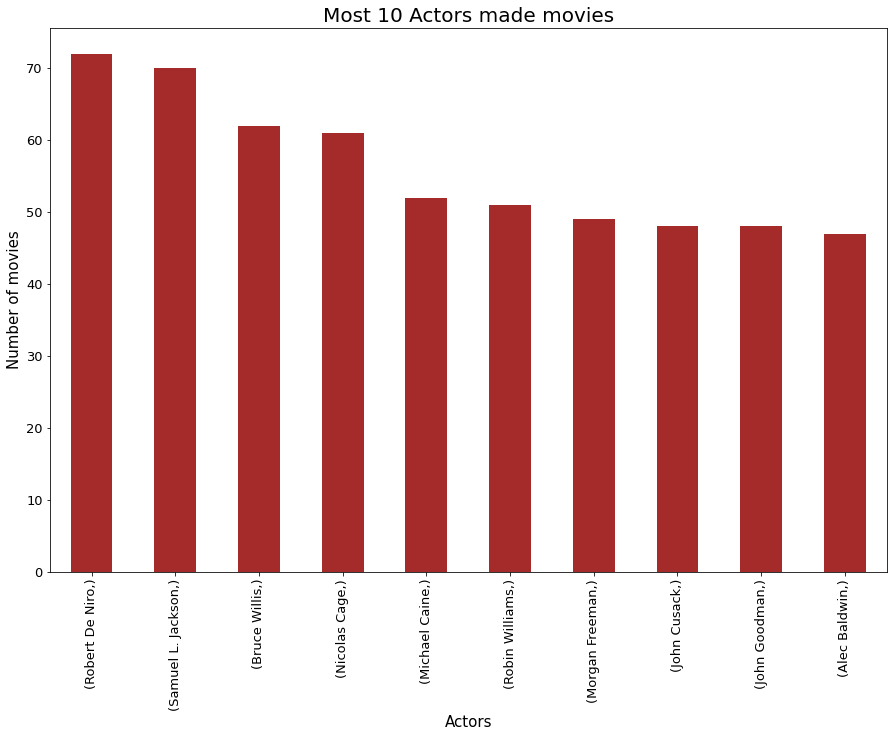

In [32]:
#use the previous function to get the top 10 actors
df_actor = top_10("cast")
# Create a bar chart of the most 10 actors who made movies
df_actor.plot(kind="bar", fontsize= 13, figsize= (15,10), color="brown");
plt.title("Most 10 Actors made movies", fontsize=20);
plt.xlabel("Actors", fontsize=15);
plt.ylabel("Number of movies", fontsize=15);

### Research Question 5 (What is the most year has movies released?)

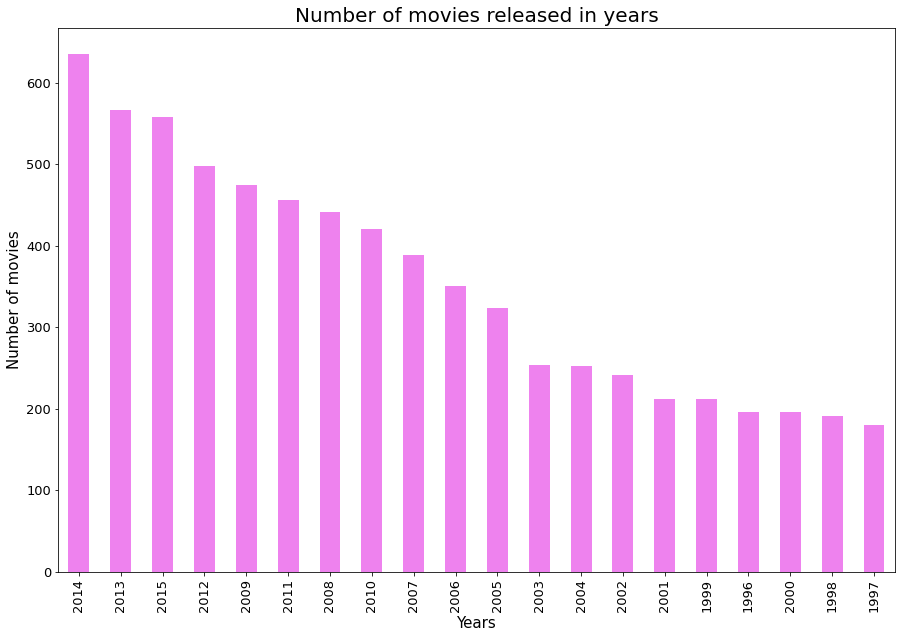

In [33]:
# Create a bar chart of the top 20 years releasing movies
df["release_year"].value_counts().iloc[:20].plot(kind="bar", fontsize= 13, figsize= (15,10), color="violet");
plt.title("Number of movies released in years", fontsize=20);
plt.xlabel("Years", fontsize=15);
plt.ylabel("Number of movies", fontsize=15);

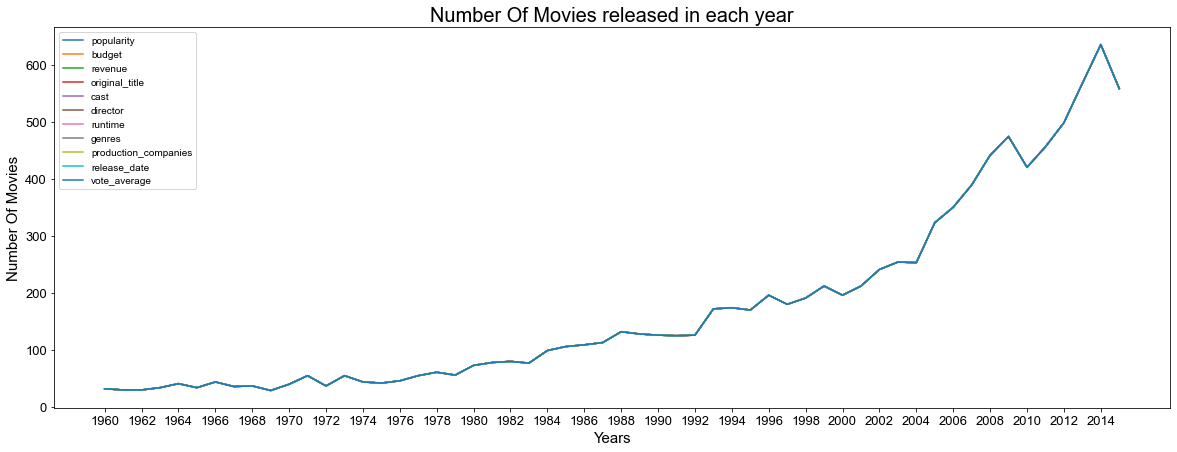

In [34]:
#create a line chart to get the number of movies trend over the years
df.groupby('release_year').count().plot(fontsize= 13, figsize=(20,7), xticks = np.arange(1960,2016,2))
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Number Of Movies released in each year",fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15)
#set the style sheet
sns.set_style("whitegrid")


### Reserch Question 6 (What is the most month has movies released?)

In [35]:
#extract month from "release_date" and create new column "month"
df['month'] = df['release_date'].dt.month_name()
df['month']

0            June
1             May
2           March
3        December
4           April
           ...   
10861        June
10862    December
10863     January
10864    November
10865    November
Name: month, Length: 9772, dtype: object

Text(0, 0.5, 'Movies Percentage')

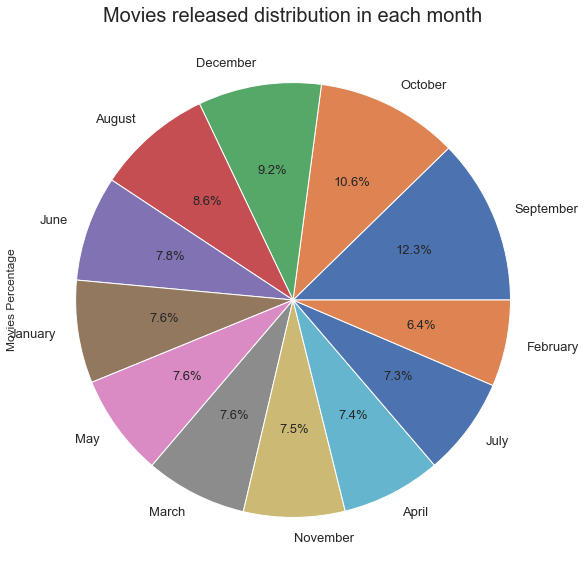

In [36]:
# Create a pie chart presenting the percentage of Movies distibution over the months
df.month.value_counts().plot(kind="pie", fontsize= 13, figsize= (15,10), autopct='%1.1f%%');
plt.title("Movies released distribution in each month", fontsize=20);
plt.ylabel("Movies Percentage")

#### "Drama" is the most popular genre of movies then comes "Comedy".
#### "Woody Allen" is the most director who has directed movies then comes "Clint Eastwood".
#### "Robert De Niro" is the most actor who has made movies then comes "Samuel L. Jackson".
#### "Universal Pictures"is the most company which has produced movies then comes"Warner Bros." then "Paramount Pictures" .
#### "2014" is the most year for movie releases.
#### "September" is the most month for movie releases.

## Part 3 

### Research Question 1 (Is there a relationship between movie revenue and its popularity? How?)

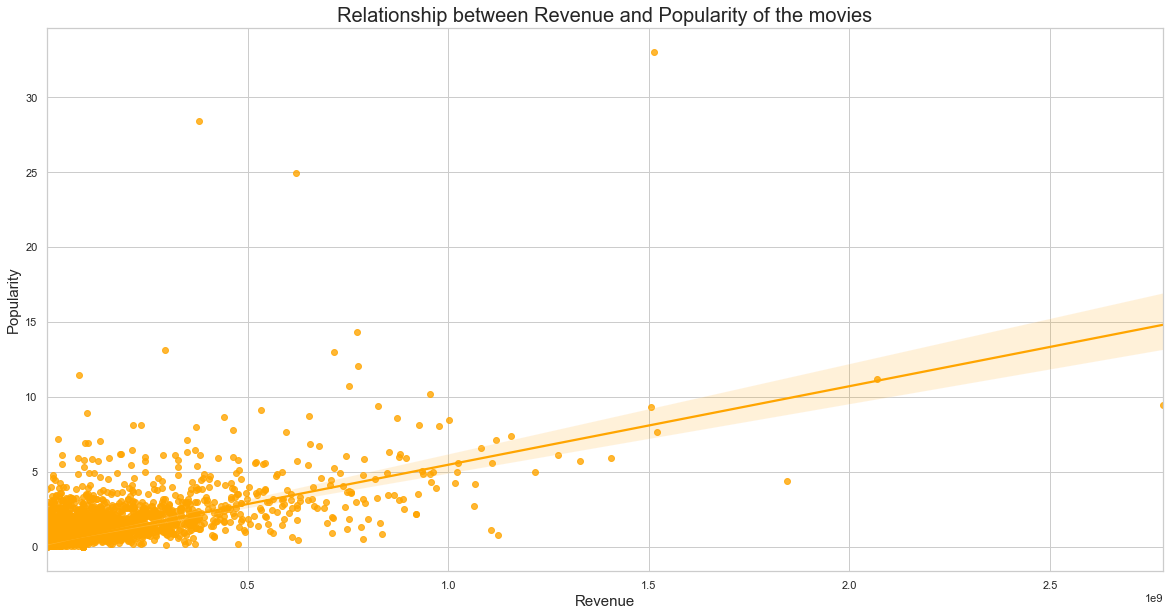

In [37]:
#Ceate a scatter plot 
sns.regplot(x=df['revenue'], y=df['popularity'], color='orange')
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid")
plt.title("Relationship between Revenue and Popularity of the movies", fontsize=20);
plt.xlabel("Revenue", fontsize=15);
plt.ylabel("Popularity", fontsize=15);

### Research Question 2 (Is there a relationship between movie revenue and its rate? How?)

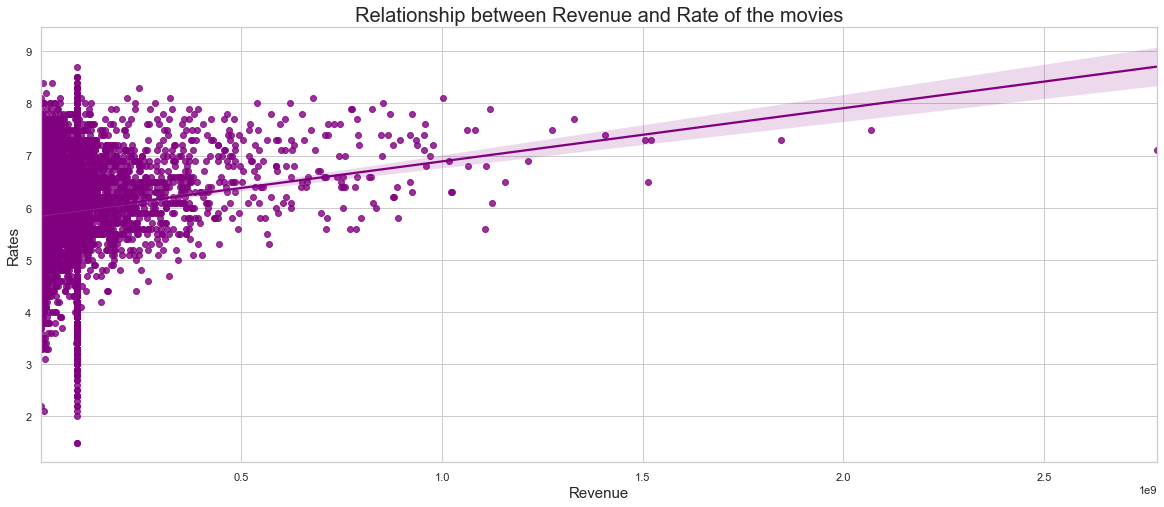

In [38]:
#Ceate a scatter plot 
sns.regplot(x=df['revenue'], y=df['vote_average'], color='purple')
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid")
plt.title("Relationship between Revenue and Rate of the movies", fontsize=20);
plt.xlabel("Revenue", fontsize=15);
plt.ylabel("Rates", fontsize=15);

### Research Question 3 (Is there a relationship between movie revenue and its budget? How?)


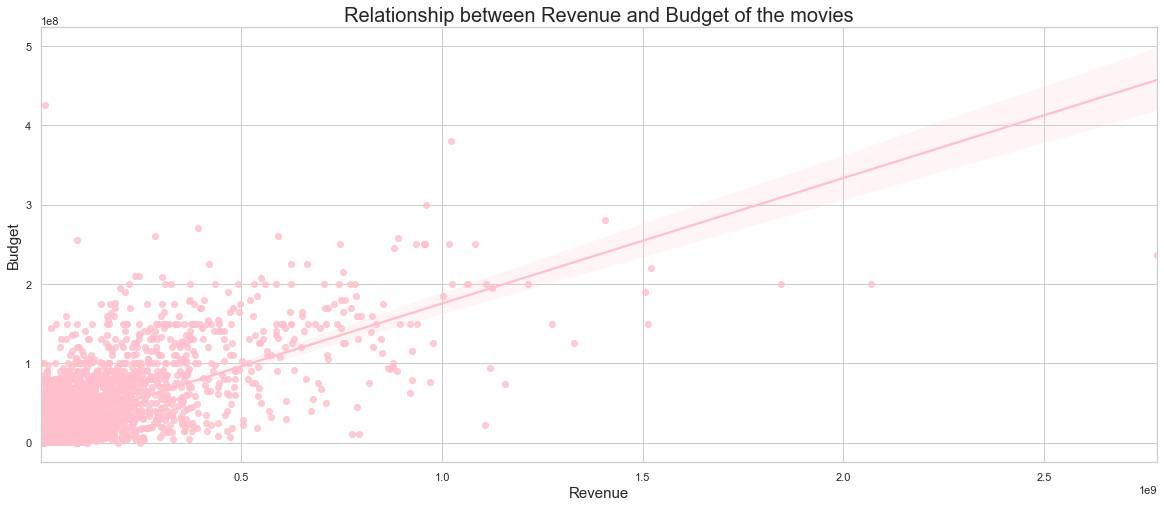

In [39]:
#Ceate a scatter plot 
sns.regplot(x=df['revenue'], y=df['budget'], color='pink')
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid")
plt.title("Relationship between Revenue and Budget of the movies", fontsize=20);
plt.xlabel("Revenue", fontsize=15);
plt.ylabel("Budget", fontsize=15);

#### There is a proportional relationship between the revenue of the movie and its popularity.
#### There is a proportional relationship between the revenue of the movie and its rate.
#### There is a proportional relationship between the revenue of the movie and its budget.

<a id='conclusions'></a>
## Conclusions

### First 

##### "Jurassic World" is the most popular movie. 

#####  "Avatar" has the highest revenue. 

#####  "pink Floyd: Pulse" has the highest rate. 

#####  The most frequent runtime duration of the movies is in the range (90-120) minutes. 

 

### Second 

##### "Drama" is the most popular genre of movies then comes "Comedy". 

##### "Woody Allen" is the most director who has directed movies then comes "Clint Eastwood". 

##### "Robert De Niro" is the most actor who has made movies then comes "Samuel L. Jackson". 

##### "Universal Pictures"is the most company which has produced movies then comes"Warner Bros." then "Paramount Pictures" .

##### "2014" is the most year for movie releases. 

##### "September" is the most month for movie releases. 

 

### Finally 

##### There is a proportional relationship between the revenue of the movie and its popularity. 

##### There is a proportional relationship between the revenue of the movie and its rate. 

##### There is a proportional relationship between the revenue of the movie and its budget. 

### Limitations

##### 1- Tha Data Set in not updated. There is no data from 2016 till now, that means our findings may change depending on the data will be added. 
##### 2- The number of voices that evaluated the movies are different which gives inaccurate reviews.
##### 3- There are many thousands of missing data and zero values which lead to inaccurate analysis even we remove them or change them with thte mean values.